# Assignment 6 : Spam Filtering

---


Total Points: **100**

Tentative Weightage : **20%**

Submission Deadline : **10th November 2021 , 11:00 AM**

---



General Instructions:

---


1. You have to do this lab individually.
2. You may use **seaborn, matplotlib, pandas, numpy, csv, nltk, sklearn, scikit-learn libraries**
3. All the code should be submitted in the form of a single colab notebook.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). 
6. The assignment must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the notebook.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to write your **observations** (preferably in a text block) and not just an error free code.
9. You are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be considered for evaluation.
11. The marks will be awarded on the basis of quality of code, use of innovative data structures, scalability, correctness, and observations made.
12. You can add as many code or text cells in this notebook.
13. You will have to mount your drive and change the paths according to your implementation. 


#Dataset

###About the Dataset

Dataset is available here (https://drive.google.com/file/d/1-DrTyeuoRFsvSUoNcQhtDUZjyk95hRRg/view?usp=sharing). <br> You have to download this dataset and upload it on your google drive. Read the csv file (present in above mentioned link) into dataframe in your code to proceed further.


In [ ]:

#google drive mounted here

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

#change the current working diectory path accordingly



Mounted at /content/MyDrive


In [ ]:
#Perform necessary imports here

import pandas as pd
import matplotlib.pyplot as plot
import re
import nltk
import numpy as np
nltk.download('punkt')
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#**Section 1: (5 points)** 

1. Download and load the dataset in pandas dataframe (1 point).

2. Display total number of rows and columns in dataset (1 point).

3. Show the first 5 entries of the dataframe (1 point).

4. Plot a bar graph showing number of spams and hams in dataset (2 points).

In [ ]:
# Please insert your code here

df = pd.read_csv("/content/MyDrive/MyDrive/DataSet_Assignment6.csv")
print("rows:",df.shape[0])
print("columns:", df.shape[1])
df.head(5)

rows: 5708
columns: 2


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


0    4350
1    1358
Name: spam, dtype: int64


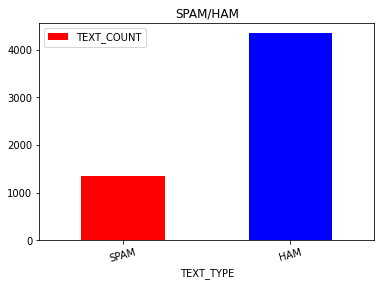

In [ ]:
# Please insert your code here

plot_data = (df["spam"].value_counts())
print(  plot_data )
data = {"TEXT_TYPE":["SPAM", "HAM"],
        "TEXT_COUNT":[plot_data[1],plot_data[0]]}
#  Dictionary loaded into a DataFrame
dataFrame = pd.DataFrame(data=data)
# Draw a vertical bar chart
dataFrame.plot.bar(color=['red','blue'],x="TEXT_TYPE", y="TEXT_COUNT",rot=15, title="SPAM/HAM")
plot.show(block=True)


**Observations:**

Write your observations from about the dataset here regarding the data distribution of spam/ham emails, etc.


* Dataset conatins two columns (text,spam) and 5708 rows. Columns are named as "text" and "spam".
* Each row of the "text" column has a string containing special characters, non-meaning ful words, single caracters, numeric characters, puntuations,stop words and also hyperlinks.
* This dataset contains 4350 non spam (ham) text and 1358 spam text. Each row of the "text" section contaion a subject portion and its corresponding body section.


#**Section 2: Preprocessing (15 points)**



### Task 1 (10 points):
1. Remove all the punctuations from the text in dataset (2 point).

2. Remove all numericals from text (2 points).

3. Remove hyperlinks from text (2 points).

2. Convert all text in lower case (2 points).

5. Remove spaces from text (1 point).

6. Display any five rows of your dataframe on which above five operation are implemented (1 point).



In [ ]:
# remove hyperlinks
rows = df.shape[0]
for i in range(rows):
        s = df.loc[i][0]
        res = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', s, flags=re.MULTILINE)
        res=re.sub(r'(www)\s?\.\s?([a-z\.]{2,6})\s?([\/\w\.-]*)',' ',s,flags=re.MULTILINE)
        res=re.sub('(https|http)', ' ', res)
        # df.loc[i,['text','spam']] = [re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', s, flags=re.MULTILINE),df.loc[i][1]]
        df.loc[i,['text','spam']] = [res,df.loc[i][1]]
df.head(5)
print(df.loc[41][0])

subject bro check awesom new product wish could better  www gretan com s cheer mind vigor mind war god way teach american geographi human power compound time patienc strive excel perfect kill lost import part life 


In [ ]:
# remove puncutation
rows = df.shape[0]
for i in range(rows):
        s = df.loc[i][0]
        df.loc[i,['text','spam']] = [re.sub(r'[^\w\s]', '', s),df.loc[i][1]]

df.head(2)
print(df.loc[7][0])


subject save money buy get thing tri ciall yet even imagin like real man bed thing great errrectlon provid exactiy want ciali lot advantag viagra effect iast hour readi start within minut mix aicohol ship countri get right 


In [ ]:
# remove numericals
for i in range(rows):
        s = df.loc[i][0]
        df.loc[i,['text','spam']] = [re.sub(r'[0-9]', '', s),df.loc[i][1]]
df.head(2)
print(df.loc[7][0])

subject save money buy get thing tri ciall yet even imagin like real man bed thing great errrectlon provid exactiy want ciali lot advantag viagra effect iast hour readi start within minut mix aicohol ship countri get right 


In [ ]:
# convert into lower case
for i in range(rows):
        s = df.loc[i][0]
        df.loc[i,['text','spam']] = [s.lower(),df.loc[i][1]]
df.head(2)
print(df.loc[7][0])

subject save money buy get thing tri ciall yet even imagin like real man bed thing great errrectlon provid exactiy want ciali lot advantag viagra effect iast hour readi start within minut mix aicohol ship countri get right 


In [ ]:
# remove extra white spaces
s_str = ''
for i in range(rows):
        s = df.loc[i][0]
        
        words = word_tokenize(s)
        for w in words:
          s_str = s_str + w + ' '
        df.loc[i,['text','spam']] = [s_str,df.loc[i][1]]
        s_str = ''
df.head(2)
print( df.loc[7][0])

subject save money buy get thing tri ciall yet even imagin like real man bed thing great errrectlon provid exactiy want ciali lot advantag viagra effect iast hour readi start within minut mix aicohol ship countri get right 


In [ ]:
# remove stop words
stop_words = set(stopwords.words('english'))
word_str = ' '
for i in range(rows):
        s = df.loc[i][0]
        word_tokens = word_tokenize(s)
        filtered_word = [w for w in word_tokens if not w in stop_words]
        filtered_word = " ".join(filtered_word)
        df.loc[i,['text','spam']] = [filtered_word,df.loc[i][1]]
df.head(2)
print(df.loc[10][0])

subject la vega high rise boom la vega fast becom major metropolitan citi new high rise tower expect built around la vega strip within next year condominium boom begun buy first earli phase pre construct price avail la vega high rise includ trump cosmopolitan mgm turnberri icon sky among join interest list www verticallv com messag sent realti one highris learn www verticallv comif wish exclud futur mail plea repli word remov subject line



### Task 2 (Word Stemming and Word lemmatization) (5 points):



**Word Stemming:** is a process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

**Word lemmatization:** is a process of utilizing the dictionary of a particular language and trying to convert the words back to its base form.

These techniques try to reduce the words to its most basic form.

You have to convert the text using stemming and lemmatization  and display five random examples of the converted text.



Hint: Implementation of these algorithms is available in nltk library.

In [ ]:
# Please insert your code here
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
s_str = ''

for i in range(rows):
  s = df.loc[i][0]
  words = word_tokenize(s)
  for w in words:
    # s_str = s_str + lemmatizer.lemmatize(ps.stem(w)) + ' '
    s_str = s_str + ps.stem(lemmatizer.lemmatize(w)) + ' '
    # s_str.join(ps.stem(w))
  df.loc[i,['text','spam']] = [s_str,df.loc[i][1]]
  s_str = ''
df.head(2)


,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsl fanni merril muzo co...,1


#**Section 3: Vectorization (5 points)**

1. Convert text to numerical vectors (such as TF.IDF). You may use available library function for the same.

In [ ]:
# Please insert your code here

vectorizer = TfidfVectorizer()
df.head(5)
vectors = vectorizer.fit_transform(df['text'])
print(vectors.shape)
features = vectors
tfidf_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

# print(tfidf_df)
# df.drop('text', axis=1, inplace=True)
# res = pd.concat([df, tfidf_df], axis=1)
# res.head(5)
# print(res)

(5708, 25250)


#**Section 4: Splitting Data (5 points)**

You have to divide the given dataset two parts called train and test data, in the ratio 80:20 i.e. train data will contain 80% of total dataset and test will contain 20% dataset. The distribution of spam and ham email in train and test should be balanced.

You have to use Random state : 42

In [ ]:
# Please insert your code here

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['spam'], test_size=0.20, random_state=42)
print(X_train.head(2))
print(y_train.head(2))


       aa  aaa  aaaenerfax  aadedeji  ...  zzmacmac  zzn  zzncacst  zzzz
4448  0.0  0.0         0.0       0.0  ...       0.0  0.0       0.0   0.0
2304  0.0  0.0         0.0       0.0  ...       0.0  0.0       0.0   0.0

[2 rows x 25250 columns]
4448    0
2304    0
Name: spam, dtype: int64


#**Section 5: Vector-distance based Spam Filter (15 points)**


1. Implement the vector-distance based spam filter as discussed in the class (the method is described in the slides shared in the google classroom)

2. Report the accuracy, and f-measure. (Your can explore about accuracy and F-measure metrics here are some helpful links: 

Accuracy: https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification

F-measure: https://en.wikipedia.org/wiki/F-score


3. Plot the confusion matrix.
https://en.wikipedia.org/wiki/Confusion_matrix

4. Comment on the classifier's performance

In [ ]:
spam = []
ham = []
for i in X_train.index:
  if y_train[i] == 1:
    spam.append(X_train.loc[i,:].values)
  else:
    ham.append(X_train.loc[i,:].values)

# print(spam)


In [ ]:
#  from sklearn.metrics.pairwise import cosine_similarity
#  result = cosine_similarity(X_test,spam)
#  print(result)

In [ ]:
l = []
for i in X_test.index:
  row = X_test.loc[i,:].values
  spam_dist = 0
  ham_dist = 0
  
  for j in range(len(spam)):
    spam_row = spam[j] 
    spam_dist = spam_dist + np.linalg.norm(row-spam_row)
  for k in range(len(ham)):
    ham_row = ham[k]
    ham_dist = ham_dist + np.linalg.norm(row-ham_row)
  
  spam_dist = spam_dist / len(spam)
  ham_dist = ham_dist / len( ham )

  if ham_dist < spam_dist:
    l.append(0)
  else: 
    l.append(1)

# print( l )

0.9816112084063048
0.964824120603015
[[833  12]
 [  9 288]]


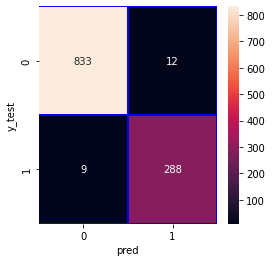

In [ ]:
import seaborn as sns
x = accuracy_score(y_test,l)
y = f1_score(y_test,l)
z = confusion_matrix(y_test,l)
f, ax = plot.subplots(figsize =(4,4))
sns.heatmap(z,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plot.xlabel("pred")
plot.ylabel("y_test")
print(x)
print(y)
print(z)
plot.show()


Comments:

1. Accuracy percentage of vector distance based classification is approx 98.16112084063048 %
2. F1 score of decision tree classifier is approx 0.964824120603015
3. Confusion Matrix has values 
  833 (True Negative)
  12 (False Positive)
  8 (False Negative)
  288 (True Positive)
4. Vector distance based classification shown better result after removing of stop words. 
5.Vector distance based classificaiton performs better with eculidian distance.



#**Section 6: Naiive Bayes (15 points)**


1. Apply Naive Bayes classifier to classify Spam/ham.

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance



0.9816112084063048
0.964824120603015
[[839   6]
 [ 14 283]]


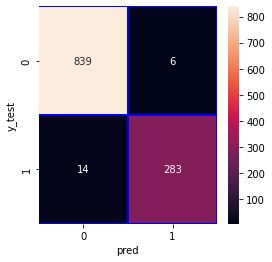

In [ ]:
# Please insert your code here
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, y_train)
pred = mnb.predict(X_test)
x_mnb = accuracy_score(y_test,pred)
y_mnb = f1_score(y_test,pred)
z_mnb = confusion_matrix(y_test,pred)
f, ax = plot.subplots(figsize =(4,4))
sns.heatmap(z_mnb,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plot.xlabel("pred")
plot.ylabel("y_test")

print(x)
print(y)
print(z_mnb)
plot.show()

Comments:

1. Accuracy percentage of decision tree classifier is approx 98.16112084063048 %
2. F1 score of decision tree classifier is approx 0.964824120603015
3. Confusion Matrix has values 
  839 (True Negative)
  6 (False Positive)
  14 (False Negative)
  283 (True Positive)
4. Naiive Nayes Classifiers shown better result because of independent fatures than others.
5. Naiive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is a family of algorithms where all of them has a fact that, every pair of features being classified is independent of each other.

 

#**Section 7: Decision Tree (15 points)**
1. Apply Decision Tree Algorithm

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance

0.9597197898423818
0.9220338983050849
[[824  21]
 [ 25 272]]


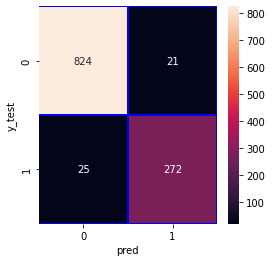

In [ ]:
# Please insert your code here
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=190)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
x_dtc = accuracy_score(y_test,pred)
y_dtc = f1_score(y_test,pred)
z_dtc = confusion_matrix(y_test,pred)
f, ax = plot.subplots(figsize =(4,4))
sns.heatmap(z_dtc,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plot.xlabel("pred")
plot.ylabel("y_test")
print(x_dtc)
print(y_dtc)
print(z_dtc)
plot.show()

Comments: 

1. Accuracy percentage of decision tree classifier is approx 95.97197898423818  %
2. F1 score of decision tree classifier is approx 0.9220338983050849
3. Confusion Matrix has values 
  824 (True Negative)
  21 (False Positive)
  25 (False Negative)
  272 (True Positive)
4. Decision tree Classifier has lower accuracy other than Naive Bias for such kind of dataset. This may be happened because of lacking of find correct data regions or not able to find similarity with regions.




#**Section 8: Support Vector Machine (15 points)**

You have to use "linear" kernel.


1. Apply Support Vector Machine (SVM) algorithm

2. Report the accuracy, and f-measure.

3. Plot the confusion matrix.

4. Comment on the classifier's performance


0.9921190893169878
0.9847198641765704
[[843   2]
 [  7 290]]


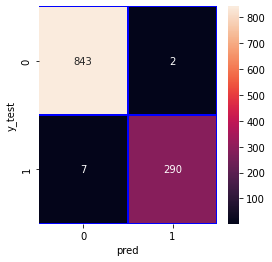

In [ ]:
# Please insert your code here
from sklearn.svm import SVC
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(features, df['spam'], test_size=0.20, random_state=42)
svc = SVC(kernel='linear', gamma=1.0)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
x_svc = accuracy_score(y_test,pred)
y_svc = f1_score(y_test,pred)
z_svc = confusion_matrix(y_test,pred)
f, ax = plot.subplots(figsize =(4,4))
sns.heatmap(z_svc,annot = True,linewidths=0.5,linecolor="blue",fmt = ".0f",ax=ax)
plot.xlabel("pred")
plot.ylabel("y_test")
print(x_svc)
print(y_svc)
print(z_svc)
plot.show()

Comments:

1. Accuracy percentage by applying SVM Algorithm on test data is 99.21190893169878 %
2. F1 score by applying SVM Algorithm on test data is 0.9847198641765704
3. Confusion Matrix has values 
  843 (True Negative)
  2 (False Positive)
  7 (False Negative)
  290 (True Positive)
4. SVM provide better accuracy and f1 score value as compared to vector distance or Naive bais or decision tree classifier because of its underlying capacity to model multidimensional boundaries.






#**Section 9: Compare all the classifiers' performances using graphs/plots and write your observations (10 points)**

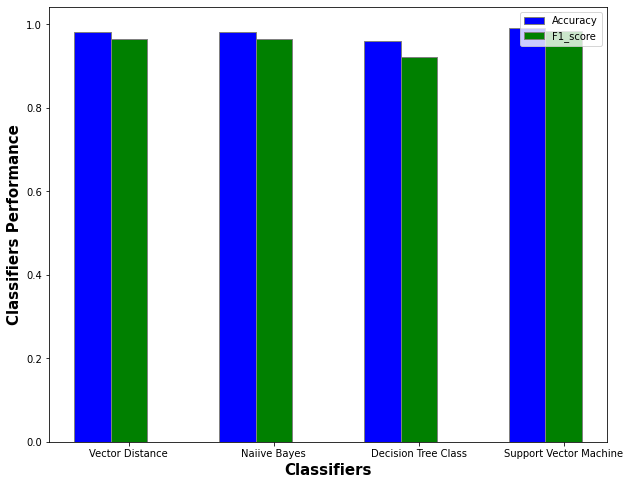

In [ ]:
#Insert code here
barWidth = 0.25
fig = plot.subplots(figsize =(10, 8))
 
Accuracy = [x,x_mnb, x_dtc,x_svc]
F1_score = [y,y_mnb, y_dtc,y_svc]
 
# Set position of bar on X axis
bar1 = np.arange(len(Accuracy))
bar2 = [x + barWidth for x in bar1]
 
# Make the plot
plot.bar(bar1, Accuracy, color ='b', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plot.bar(bar2, F1_score, color ='g', width = barWidth,
        edgecolor ='grey', label ='F1_score')

# Adding Xticks
plot.xlabel('Classifiers', fontweight ='bold', fontsize = 15)
plot.ylabel('Classifiers Performance', fontweight ='bold', fontsize = 15)
plot.xticks([r + barWidth for r in range(len(Accuracy))],
        ['Vector Distance','Naiive Bayes', 'Decision Tree Class', 'Support Vector Machine'])
plot.legend()
plot.show()

Observations

* Vector based distance classification approach take more time as compared to other classifiers.

* Finding distance of each test data with every vector of spam and non spam class and take mean leads to low accuracy and f1 scores values as compared to SVM classifier 

* In binary class classification there is a possibility that some messages can be classified as spam and as well as non spam messages. In such cases SVM has high f1 score value as comapared to decision tree classifier. 

* SVM takes more time as comapared to Naiive Bayes 

* Decision tree classifier has lowest accuracy as comapared to other classifiers.

* Decision tree classifier has more dependency on dataset and several usecases as compared to other classifiers.











